# What are the most demanded skills for the top 3 most popular data roles (Data Analyst, Data Engineer, Data Scientist)?

### Methodology

1. Load librairies, load data and clean data
2. Calculate count of skills for each job type in the US
3. Calculate skill % 
4. Plot findings

### Import Librairies and Data

In [1]:
# Load Librairies
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\erard\anaconda3\envs\Luke_Barousse_Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Calculations

In [2]:
# filter the df for US jobs only

df_US = df[df["job_country"] == "United States"].copy()

In [4]:
# break out the list of "skills" in the "job_skills" column

df_skills = df_US.explode("job_skills")

In [9]:
# group by job_skills and job_title_short - to find the no. if skills per data role

df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

# transform it in a dataframe from a series 
df_skills_count = df_skills_count.reset_index(name="skill_count")

# sort by skill count
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)

In [10]:
# get the three most popular job titles

job_titles = df_skills_count["job_title_short"].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

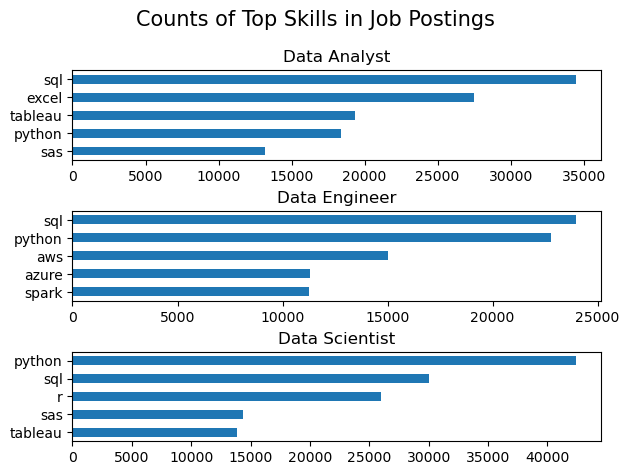

In [ ]:
# plot the skills prevalence - in absolute numbers

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [19]:
# let's calculate the % of job postings of each role that mentions the various skills (rather than absolute numbers)

df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [24]:
# we now need to merge this info into our df_skills_count df

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")

df_skills_perc["skill_percent"] = 100 * df_skills_perc["skill_count"] / df_skills_perc["jobs_total"]

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plotting

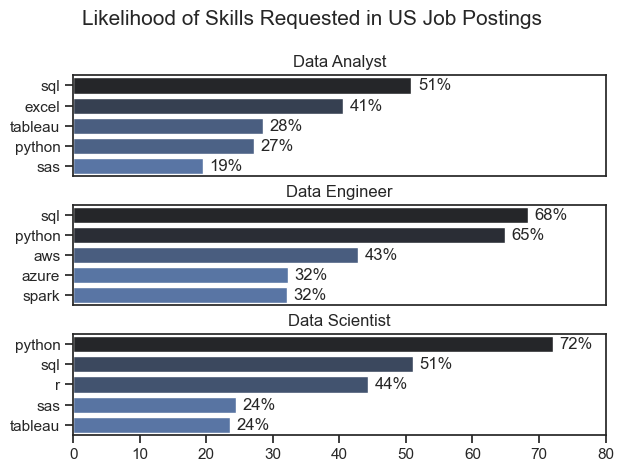

In [42]:
# plot the skills prevalence - in relative numbers

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="dark:b_r")
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,80)

    for n, v in enumerate(df_plot["skill_percent"]): # adding the % data labels
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")

    if i != len(job_titles) -1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()